<a href="https://colab.research.google.com/github/Heulito/AIsenberg/blob/main/p_erk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
#import databank from chembl
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 60 kB 7.5 MB/s 
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [3]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [4]:
# Target search for acetylcholinesterase
target = new_client.target
target_query = target.search('ERK')
targets = pd.DataFrame.from_dict(target_query)
targets

cross_references               organism  \
0   [{'xref_id': 'P36507', 'xref_name': None, 'xre...           Homo sapiens   
1   [{'xref_id': 'Q02750', 'xref_name': None, 'xre...           Homo sapiens   
2   [{'xref_id': 'P29678', 'xref_name': None, 'xre...  Oryctolagus cuniculus   
3   [{'xref_id': 'P31938', 'xref_name': None, 'xre...           Mus musculus   
4                                                  []           Homo sapiens   
5                                                  []      Rattus norvegicus   
6                                                  []           Mus musculus   
7                                                  []           Homo sapiens   
8   [{'xref_id': 'Q8TD08', 'xref_name': None, 'xre...           Homo sapiens   
9                                                  []           Homo sapiens   
10                                                 []           Homo sapiens   
11                                                 []           Homo sapiens   
12                                                 []           Homo sapiens   
13  [{'xref_id': 'P47809', 'xref_name': None, 'xre...           Mus musculus   
14  [{'xref_id': 'Q99759', 'xref_name': None, 'xre...           Homo sapiens   
15  [{'xref_id': 'Q9Y2U5', 'xref_name': None, 'xre...           Homo sapiens   
16                                                 []           Homo sapiens   
17                                                 []           Homo sapiens   
18  [{'xref_id': 'Q13163', 'xref_name': None, 'xre...           Homo sapiens   
19  [{'xref_id': 'P45985', 'xref_name': None, 'xre...           Homo sapiens   
20  [{'xref_id': 'P29323', 'xref_name': None, 'xre...           Homo sapiens   
21  [{'xref_id': 'Q13233', 'xref_name': None, 'xre...           Homo sapiens   
22  [{'xref_id': 'Q99683', 'xref_name': None, 'xre...           Homo sapiens   
23  [{'xref_id': 'Q9Y4K4', 'xref_name': None, 'xre...           Homo sapiens   
24  [{'xref_id': 'MAP3K4', 'xref_name': None, 'xre...           Homo sapiens   
25  [{'xref_id': 'Q13164', 'xref_name': None, 'xre...           Homo sapiens   
26  [{'xref_id': 'Q16659', 'xref_name': None, 'xre...           Homo sapiens   
27  [{'xref_id': 'Q92918', 'xref_name': None, 'xre...           Homo sapiens   
28  [{'xref_id': 'P31152', 'xref_name': None, 'xre...           Homo sapiens   
29  [{'xref_id': 'Q6ZN16', 'xref_name': None, 'xre...           Homo sapiens   
30                                                 []           Mus musculus   
31                                                 []           Homo sapiens   
32                                                 []           Mus musculus   
33  [{'xref_id': 'P52564', 'xref_name': None, 'xre...           Homo sapiens   
34  [{'xref_id': 'P46734', 'xref_name': None, 'xre...           Homo sapiens   
35  [{'xref_id': 'P63085', 'xref_name': None, 'xre...           Mus musculus   
36  [{'xref_id': 'P28482', 'xref_name': None, 'xre...           Homo sapiens   
37  [{'xref_id': 'P27361', 'xref_name': None, 'xre...           Homo sapiens   
38  [{'xref_id': 'P53778', 'xref_name': None, 'xre...           Homo sapiens   
39  [{'xref_id': 'P63086', 'xref_name': None, 'xre...      Rattus norvegicus   
40  [{'xref_id': 'Q12851', 'xref_name': None, 'xre...           Homo sapiens   
41  [{'xref_id': 'Q8IVH8', 'xref_name': None, 'xre...           Homo sapiens   
42  [{'xref_id': 'O95819', 'xref_name': None, 'xre...           Homo sapiens   
43                                                 []           Homo sapiens   
44                                                 []           Mus musculus   
45                                                 []      Rattus norvegicus   
46                                                 []           Mus musculus   
47  [{'xref_id': 'Q63844', 'xref_name': None, 'xre...           Mus musculus   
48  [{'xref_id': 'MINK1', 'xref_name': None, 'xref...           Homo sapiens   
49  [{'xref_id': 'P21708', 'xref_name

In [5]:
selected_target = targets.target_chembl_id[36]
selected_target

'CHEMBL4040'

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [7]:
df = pd.DataFrame.from_dict(res)

In [8]:
len(df)

4668

In [9]:
pd.set_option('display.max_columns', None)
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


activity_comment  activity_id  \
2                None       315773   
3                None       315778   
4                None       317028   
5                None       321905   
7                None       324472   
...               ...          ...   
4663       Not Active     23347100   
4664       Not Active     23347101   
4665             None     23372794   
4666             None     23373203   
4667             None     23373562   

                                    activity_properties assay_chembl_id  \
2                                                    []    CHEMBL729502   
3                                                    []    CHEMBL729502   
4                                                    []    CHEMBL729502   
5                                                    []    CHEMBL729502   
7                                                    []    CHEMBL729502   
...                                                 ...             ...   
4663                                                 []   CHEMBL4882597   
4664                                                 []   CHEMBL4882600   
4665  [{'comments': None, 'relation': None, 'result_...   CHEMBL4884759   
4666  [{'comments': None, 'relation': None, 'result_...   CHEMBL4885050   
4667  [{'comments': None, 'relation': None, 'result_...   CHEMBL4885339   

                                      assay_description assay_type  \
2     Inhibition of Mitogen-activated protein kinase...          B   
3     Inhibition of Mitogen-activated protein kinase...          B   
4     Inhibition of Mitogen-activated protein kinase...          B   
5     Inhibition of Mitogen-activated protein kinase...          B   
7     Inhibition of Mitogen-activated protein kinase...          B   
...                                                 ...        ...   
4663  Cell Assay: Inhibition of RSK phosphorylation ...          B   
4664                   Anti-Proliferation assay: A375SM          F   
4665          ERK2(MAP1LGY1) Takeda global kinase panel          B   
4666          ERK2(MAP1LGY1) Takeda global kinase panel          B   
4667          ERK2(MAP1LGY1) Takeda global kinase panel          B   

     assay_variant_accession assay_variant_mutation bao_endpoint   bao_format  \
2                       None                   None  BAO_0000190  BAO_0000357   
3                       None                   None  BAO_0000190  BAO_0000357   
4                       None                   None  BAO_0000190  BAO_0000357   
5                       None                   None  BAO_0000190  BAO_0000357   
7                       None                   None  BAO_0000190  BAO_0000357   
...                      ...                    ...          ...          ...   
4663                    None                   None  BAO_0000190  BAO_0000219   
4664                    None                   None  BAO_0000190  BAO_0000219   
4665                    None                   None  BAO_0000190  BAO_0000357   
4666                    None                   None  BAO_0000190  BAO_0000357   
4667                    None                   None  BAO_0000190  BAO_0000357   

                  bao_label  \
2     single protein format   
3     single protein format   
4     single protein format   
5     single protein format   
7     single protein format   
...                     ...   
4663      cell-based format   
4664      cell-based format   
4665  single protein format   
4666  single protein format   
4667  single protein format   

                                       canonical_smiles  \
2           Nc1ncc(/C=C/CNC(=O)c2cc(Br)c(Br)[nH]2)[nH]1   
3                      COc1cccc(-c2cc(=O)c3ccccc3o2)c1N   
4     CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...   
5                              NC(=O)c1cc(Br)c(Br)[nH]1   
7           NC1=NC(=O)/C(=C2\CCNC(=O)c3[nH]c(Br)cc32)N1   
...                                                 ...   
4663        C[C@H](NC(=O)Nc1cc2[nH]ncc2c(CO)n1)

In [10]:
df3 = df2[df2.standard_relation == '=']

In [11]:
df3

activity_comment  activity_id  \
3                None       315778   
4                None       317028   
7                None       324472   
8                None       325612   
9                None       326821   
...               ...          ...   
4645             None     23246492   
4646             None     23246493   
4647             None     23246494   
4648             None     23246495   
4649             None     23246496   

                                    activity_properties assay_chembl_id  \
3                                                    []    CHEMBL729502   
4                                                    []    CHEMBL729502   
7                                                    []    CHEMBL729502   
8                                                    []    CHEMBL729502   
9                                                    []    CHEMBL729502   
...                                                 ...             ...   
4645  [{'comments': None, 'relation': '=', 'result_f...   CHEMBL4830153   
4646  [{'comments': None, 'relation': '=', 'result_f...   CHEMBL4830153   
4647  [{'comments': None, 'relation': '=', 'result_f...   CHEMBL4830153   
4648  [{'comments': None, 'relation': '=', 'result_f...   CHEMBL4830153   
4649  [{'comments': None, 'relation': '=', 'result_f...   CHEMBL4830153   

                                      assay_description assay_type  \
3     Inhibition of Mitogen-activated protein kinase...          B   
4     Inhibition of Mitogen-activated protein kinase...          B   
7     Inhibition of Mitogen-activated protein kinase...          B   
8     Inhibition of Mitogen-activated protein kinase...          B   
9     Inhibition of Mitogen-activated protein kinase...          B   
...                                                 ...        ...   
4645  Inhibition of full-length human N-terminal MAH...          B   
4646  Inhibition of full-length human N-terminal MAH...          B   
4647  Inhibition of full-length human N-terminal MAH...          B   
4648  Inhibition of full-length human N-terminal MAH...          B   
4649  Inhibition of full-length human N-terminal MAH...          B   

     assay_variant_accession assay_variant_mutation bao_endpoint   bao_format  \
3                       None                   None  BAO_0000190  BAO_0000357   
4                       None                   None  BAO_0000190  BAO_0000357   
7                       None                   None  BAO_0000190  BAO_0000357   
8                       None                   None  BAO_0000190  BAO_0000357   
9                       None                   None  BAO_0000190  BAO_0000357   
...                      ...                    ...          ...          ...   
4645                    None                   None  BAO_0000190  BAO_0000019   
4646                    None                   None  BAO_0000190  BAO_0000019   
4647                    None                   None  BAO_0000190  BAO_0000019   
4648                    None                   None  BAO_0000190  BAO_0000019   
4649                    None                   None  BAO_0000190  BAO_0000019   

                  bao_label  \
3     single protein format   
4     single protein format   
7     single protein format   
8     single protein format   
9     single protein format   
...                     ...   
4645           assay format   
4646           assay format   
4647           assay format   
4648           assay format   
4649           assay format   

                                       canonical_smiles data_validity_comment  \
3                      COc1cccc(-c2cc(=O)c3ccccc3o2)c1N                  None   
4     CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...                  None   
7           NC1=NC(=O)/C(=C2\CCNC(=O)c3[nH]c(Br)cc32)N1                  None   
8               NC1=N/C(=C2/CCNC(=O)c3[nH]ccc32)C(=O)N1                  None   
9            Nc1nc(C2CCNC(=O)c3[nH]c(Br)c(Br)c32)c[nH]1

In [12]:
df.to_csv('bioactivity_clean_and_processed_data.csv', index=False)

In [13]:
len(df3)

3399

In [14]:
df4 = df3.drop_duplicates(['canonical_smiles'])

In [15]:
len(df4)

2916

In [16]:
# classify module in 3 catgeories
# active, inactive or intermediate
# active compund = drugs that have IC50 of less than 1 micromolar (or 1000 nano molar)
# inactive drug have a value between 1'000 and 10'000 nano molar

bioactivity_class = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [17]:
len(bioactivity_class)

2916

In [18]:
selection = ["molecule_chembl_id", "canonical_smiles", "standard_value"]
df5 = df4[selection]

In [19]:
df5.head()

molecule_chembl_id                                   canonical_smiles  \
3        CHEMBL35482                   COc1cccc(-c2cc(=O)c3ccccc3o2)c1N   
4       CHEMBL388978  CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...   
7       CHEMBL361708        NC1=NC(=O)/C(=C2\CCNC(=O)c3[nH]c(Br)cc32)N1   
8       CHEMBL255465            NC1=N/C(=C2/CCNC(=O)c3[nH]ccc32)C(=O)N1   
9       CHEMBL151430         Nc1nc(C2CCNC(=O)c3[nH]c(Br)c(Br)c32)c[nH]1   

  standard_value  
3         2800.0  
4            2.5  
7            9.0  
8          824.0  
9         1288.0

In [20]:
df6 = df5.reset_index()

In [21]:
df7 = df6.drop("index", axis=1)

In [22]:
df8 = pd.concat([df7,pd.Series(bioactivity_class)], axis=1)

In [23]:
df8

molecule_chembl_id                                   canonical_smiles  \
0           CHEMBL35482                   COc1cccc(-c2cc(=O)c3ccccc3o2)c1N   
1          CHEMBL388978  CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...   
2          CHEMBL361708        NC1=NC(=O)/C(=C2\CCNC(=O)c3[nH]c(Br)cc32)N1   
3          CHEMBL255465            NC1=N/C(=C2/CCNC(=O)c3[nH]ccc32)C(=O)N1   
4          CHEMBL151430         Nc1nc(C2CCNC(=O)c3[nH]c(Br)c(Br)c32)c[nH]1   
...                 ...                                                ...   
2911      CHEMBL4849148  COc1cc(F)cc([C@@H](CO)NC(=O)[C@@H](C)N2Cc3ccc(...   
2912      CHEMBL4873851  COc1cc(F)cc([C@@H](CO)NC(=O)[C@@H](C)N2Cc3ccc(...   
2913      CHEMBL4867689  COc1cc(F)cc([C@@H](CO)NC(=O)[C@@H](C)N2Cc3ncc(...   
2914      CHEMBL4871302  COc1cc(F)cc([C@@H](CO)NC(=O)CN2C(=O)c3cc(-c4nc...   
2915      CHEMBL4869086  COc1cc(F)cc([C@@H](CO)NC(=O)CN2Cc3ccc(-c4nc(NC...   

     standard_value             0  
0            2800.0  intermediate  
1               2.5        active  
2               9.0        active  
3             824.0        active  
4            1288.0  intermediate  
...             ...           ...  
2911           12.0        active  
2912            1.8        active  
2913            2.8        active  
2914            1.1        active  
2915            1.1        active  

[2916 rows x 4 columns]

In [24]:
df8.to_csv('bioactivity_clean_and_processed_data.csv', index=False)

# Convert IC50 to PIC50

In [25]:
df9 = pd.read_csv('bioactivity_clean_and_processed_data.csv')

In [26]:
# Convert IC50 to PIC50
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [27]:
df.standard_value.describe()

count        3802
unique       2077
top       10000.0
freq          141
Name: standard_value, dtype: object

In [28]:
-np.log10( (10**-9)* 100000000 )

1.0

In [29]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [30]:
df_norm = norm_value(df9)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


molecule_chembl_id                                   canonical_smiles  \
0           CHEMBL35482                   COc1cccc(-c2cc(=O)c3ccccc3o2)c1N   
1          CHEMBL388978  CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...   
2          CHEMBL361708        NC1=NC(=O)/C(=C2\CCNC(=O)c3[nH]c(Br)cc32)N1   
3          CHEMBL255465            NC1=N/C(=C2/CCNC(=O)c3[nH]ccc32)C(=O)N1   
4          CHEMBL151430         Nc1nc(C2CCNC(=O)c3[nH]c(Br)c(Br)c32)c[nH]1   
...                 ...                                                ...   
2911      CHEMBL4849148  COc1cc(F)cc([C@@H](CO)NC(=O)[C@@H](C)N2Cc3ccc(...   
2912      CHEMBL4873851  COc1cc(F)cc([C@@H](CO)NC(=O)[C@@H](C)N2Cc3ccc(...   
2913      CHEMBL4867689  COc1cc(F)cc([C@@H](CO)NC(=O)[C@@H](C)N2Cc3ncc(...   
2914      CHEMBL4871302  COc1cc(F)cc([C@@H](CO)NC(=O)CN2C(=O)c3cc(-c4nc...   
2915      CHEMBL4869086  COc1cc(F)cc([C@@H](CO)NC(=O)CN2Cc3ccc(-c4nc(NC...   

                 0  standard_value_norm  
0     intermediate               2800.0  
1           active                  2.5  
2           active                  9.0  
3           active                824.0  
4     intermediate               1288.0  
...            ...                  ...  
2911        active                 12.0  
2912        active                  1.8  
2913        active                  2.8  
2914        active                  1.1  
2915        active                  1.1  

[2916 rows x 4 columns]

In [31]:
df_norm.standard_value_norm.describe()

count      2916.000000
mean       1921.885342
std       18411.807198
min      -29600.000000
25%           1.300000
50%           5.820000
75%          63.325000
max      850000.000000
Name: standard_value_norm, dtype: float64

In [32]:
df10 = pIC50(df_norm)
df10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


molecule_chembl_id                                   canonical_smiles  \
0           CHEMBL35482                   COc1cccc(-c2cc(=O)c3ccccc3o2)c1N   
1          CHEMBL388978  CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...   
2          CHEMBL361708        NC1=NC(=O)/C(=C2\CCNC(=O)c3[nH]c(Br)cc32)N1   
3          CHEMBL255465            NC1=N/C(=C2/CCNC(=O)c3[nH]ccc32)C(=O)N1   
4          CHEMBL151430         Nc1nc(C2CCNC(=O)c3[nH]c(Br)c(Br)c32)c[nH]1   
...                 ...                                                ...   
2911      CHEMBL4849148  COc1cc(F)cc([C@@H](CO)NC(=O)[C@@H](C)N2Cc3ccc(...   
2912      CHEMBL4873851  COc1cc(F)cc([C@@H](CO)NC(=O)[C@@H](C)N2Cc3ccc(...   
2913      CHEMBL4867689  COc1cc(F)cc([C@@H](CO)NC(=O)[C@@H](C)N2Cc3ncc(...   
2914      CHEMBL4871302  COc1cc(F)cc([C@@H](CO)NC(=O)CN2C(=O)c3cc(-c4nc...   
2915      CHEMBL4869086  COc1cc(F)cc([C@@H](CO)NC(=O)CN2Cc3ccc(-c4nc(NC...   

                 0     pIC50  
0     intermediate  5.552842  
1           active  8.602060  
2           active  8.045757  
3           active  6.084073  
4     intermediate  5.890084  
...            ...       ...  
2911        active  7.920819  
2912        active  8.744727  
2913        active  8.552842  
2914        active  8.958607  
2915        active  8.958607  

[2916 rows x 4 columns]

In [33]:
df10.to_csv("bioactivity_clean_and_processed_data_pIC50.csv")

# Paddel Descriptors

In [34]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-11-21 14:33:03--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-11-21 14:33:03--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   159MB/s    in 0.2s    

2022-11-21 14:33:04 (159 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-11-21 14:33:04--  https://github

In [35]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [36]:
df11 = pd.read_csv("bioactivity_clean_and_processed_data_pIC50.csv")

In [37]:
df11

Unnamed: 0 molecule_chembl_id  \
0              0        CHEMBL35482   
1              1       CHEMBL388978   
2              2       CHEMBL361708   
3              3       CHEMBL255465   
4              4       CHEMBL151430   
...          ...                ...   
2911        2911      CHEMBL4849148   
2912        2912      CHEMBL4873851   
2913        2913      CHEMBL4867689   
2914        2914      CHEMBL4871302   
2915        2915      CHEMBL4869086   

                                       canonical_smiles             0  \
0                      COc1cccc(-c2cc(=O)c3ccccc3o2)c1N  intermediate   
1     CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...        active   
2           NC1=NC(=O)/C(=C2\CCNC(=O)c3[nH]c(Br)cc32)N1        active   
3               NC1=N/C(=C2/CCNC(=O)c3[nH]ccc32)C(=O)N1        active   
4            Nc1nc(C2CCNC(=O)c3[nH]c(Br)c(Br)c32)c[nH]1  intermediate   
...                                                 ...           ...   
2911  COc1cc(F)cc([C@@H](CO)NC(=O)[C@@H](C)N2Cc3ccc(...        active   
2912  COc1cc(F)cc([C@@H](CO)NC(=O)[C@@H](C)N2Cc3ccc(...        active   
2913  COc1cc(F)cc([C@@H](CO)NC(=O)[C@@H](C)N2Cc3ncc(...        active   
2914  COc1cc(F)cc([C@@H](CO)NC(=O)CN2C(=O)c3cc(-c4nc...        active   
2915  COc1cc(F)cc([C@@H](CO)NC(=O)CN2Cc3ccc(-c4nc(NC...        active   

         pIC50  
0     5.552842  
1     8.602060  
2     8.045757  
3     6.084073  
4     5.890084  
...        ...  
2911  7.920819  
2912  8.744727  
2913  8.552842  
2914  8.958607  
2915  8.958607  

[2916 rows x 5 columns]

In [38]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df11[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [39]:
df_selection

canonical_smiles molecule_chembl_id
0                      COc1cccc(-c2cc(=O)c3ccccc3o2)c1N        CHEMBL35482
1     CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...       CHEMBL388978
2           NC1=NC(=O)/C(=C2\CCNC(=O)c3[nH]c(Br)cc32)N1       CHEMBL361708
3               NC1=N/C(=C2/CCNC(=O)c3[nH]ccc32)C(=O)N1       CHEMBL255465
4            Nc1nc(C2CCNC(=O)c3[nH]c(Br)c(Br)c32)c[nH]1       CHEMBL151430
...                                                 ...                ...
2911  COc1cc(F)cc([C@@H](CO)NC(=O)[C@@H](C)N2Cc3ccc(...      CHEMBL4849148
2912  COc1cc(F)cc([C@@H](CO)NC(=O)[C@@H](C)N2Cc3ccc(...      CHEMBL4873851
2913  COc1cc(F)cc([C@@H](CO)NC(=O)[C@@H](C)N2Cc3ncc(...      CHEMBL4867689
2914  COc1cc(F)cc([C@@H](CO)NC(=O)CN2C(=O)c3cc(-c4nc...      CHEMBL4871302
2915  COc1cc(F)cc([C@@H](CO)NC(=O)CN2Cc3ccc(-c4nc(NC...      CHEMBL4869086

[2916 rows x 2 columns]

In [40]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [41]:
! bash padel.sh

Processing CHEMBL35482 in molecule.smi (1/2916). 
Processing CHEMBL388978 in molecule.smi (2/2916). 
Processing CHEMBL361708 in molecule.smi (3/2916). Average speed: 8.43 s/mol.
Processing CHEMBL255465 in molecule.smi (4/2916). Average speed: 4.42 s/mol.
Processing CHEMBL151430 in molecule.smi (5/2916). Average speed: 3.11 s/mol.
Processing CHEMBL440356 in molecule.smi (6/2916). Average speed: 2.47 s/mol.
Processing CHEMBL359106 in molecule.smi (7/2916). Average speed: 2.02 s/mol.
Processing CHEMBL75680 in molecule.smi (8/2916). Average speed: 1.75 s/mol.
Processing CHEMBL280074 in molecule.smi (9/2916). Average speed: 1.81 s/mol.
Processing CHEMBL14762 in molecule.smi (10/2916). Average speed: 1.42 s/mol.
Processing CHEMBL77155 in molecule.smi (11/2916). Average speed: 1.27 s/mol.
Processing CHEMBL332551 in molecule.smi (12/2916). Average speed: 1.18 s/mol.
Processing CHEMBL259551 in molecule.smi (13/2916). Average speed: 1.09 s/mol.
Processing CHEMBL369976 in molecule.smi (14/2916). 

In [42]:
df_y = pd.read_csv("descriptors_output.csv")

In [43]:
df_x = df11

In [44]:
df_x_y = pd.concat([df_y, df_x], axis=1)

In [45]:
df_x_y

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0       CHEMBL35482           1           1           0           0   
1      CHEMBL361708           1           1           0           0   
2      CHEMBL255465           1           1           0           0   
3      CHEMBL151430           1           1           0           0   
4      CHEMBL440356           1           0           0           0   
...             ...         ...         ...         ...         ...   
2911  CHEMBL4849148           1           1           1           0   
2912  CHEMBL4873851           1           1           1           1   
2913  CHEMBL4867689           1           1           1           0   
2914  CHEMBL4869086           1           1           1           0   
2915  CHEMBL4871302           1           1           1           0   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  \
0              0           0           0           0           0           1   
1              0           0           0           0           0           1   
2              0           0           0           0           0           1   
3              0           0           0           0           0           1   
4              0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
2911           0           0           0           0           0           1   
2912           0           0           0           0           0           1   
2913           0           0           0           0           0           1   
2914           0           0           0           0           0           1   
2915           0           0           0           0           0           1   

      PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  \
0               1            1            1            0            1   
1               1            1            0            0            1   
2               1            1            0            0            1   
3               1            1            0            0            1   
4               1            1            0            0            1   
...           ...          ...          ...          ...          ...   
2911            1            1            1            0            1   
2912            1            1            1            0            1   
2913            1            1            1            0            1   
2914            1            1            1            0            1   
2915            1            1            1            0            1   

      PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  \
0               0            0            0            1            1   
1               1            1            0            1            1   
2               1            1            0            1            1   
3               1            1            0            1            0   
4               1            0            0            1            1   
...           ...          ...          ...          ...          ...   
2911            1            1            0            1            1   
2912            1            1            0            1            1   
2913            1            1            0            1            1   
2914            1            1            0            1            1   
2915            1            1            0            1            1   

      PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...      

In [46]:
df_x_y_final= df_x_y.drop("molecule_chembl_id", axis=1)

In [47]:
# Build the target dataframe
df_x_y_final

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0       CHEMBL35482           1           1           0           0   
1      CHEMBL361708           1           1           0           0   
2      CHEMBL255465           1           1           0           0   
3      CHEMBL151430           1           1           0           0   
4      CHEMBL440356           1           0           0           0   
...             ...         ...         ...         ...         ...   
2911  CHEMBL4849148           1           1           1           0   
2912  CHEMBL4873851           1           1           1           1   
2913  CHEMBL4867689           1           1           1           0   
2914  CHEMBL4869086           1           1           1           0   
2915  CHEMBL4871302           1           1           1           0   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  \
0              0           0           0           0           0           1   
1              0           0           0           0           0           1   
2              0           0           0           0           0           1   
3              0           0           0           0           0           1   
4              0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
2911           0           0           0           0           0           1   
2912           0           0           0           0           0           1   
2913           0           0           0           0           0           1   
2914           0           0           0           0           0           1   
2915           0           0           0           0           0           1   

      PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  \
0               1            1            1            0            1   
1               1            1            0            0            1   
2               1            1            0            0            1   
3               1            1            0            0            1   
4               1            1            0            0            1   
...           ...          ...          ...          ...          ...   
2911            1            1            1            0            1   
2912            1            1            1            0            1   
2913            1            1            1            0            1   
2914            1            1            1            0            1   
2915            1            1            1            0            1   

      PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  \
0               0            0            0            1            1   
1               1            1            0            1            1   
2               1            1            0            1            1   
3               1            1            0            1            0   
4               1            0            0            1            1   
...           ...          ...          ...          ...          ...   
2911            1            1            0            1            1   
2912            1            1            0            1            1   
2913            1            1            0            1            1   
2914            1            1            0            1            1   
2915            1            1            0            1            1   

      PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...      

In [48]:
df_x_y_final_2= df_x_y_final.drop("Unnamed: 0", axis=1)

In [49]:
df_x_y_final_2.to_csv('final_data_paddel_descritpors_bioactivity_data.csv')

# **Machine Learning Modell**

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [51]:
df11 = pd.read_csv("final_data_paddel_descritpors_bioactivity_data.csv")

In [52]:
df11

Unnamed: 0           Name  PubchemFP0  PubchemFP1  PubchemFP2  \
0              0    CHEMBL35482           1           1           0   
1              1   CHEMBL361708           1           1           0   
2              2   CHEMBL255465           1           1           0   
3              3   CHEMBL151430           1           1           0   
4              4   CHEMBL440356           1           0           0   
...          ...            ...         ...         ...         ...   
2911        2911  CHEMBL4849148           1           1           1   
2912        2912  CHEMBL4873851           1           1           1   
2913        2913  CHEMBL4867689           1           1           1   
2914        2914  CHEMBL4869086           1           1           1   
2915        2915  CHEMBL4871302           1           1           1   

      PubchemFP3  PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
2911           0           0           0           0           0           0   
2912           1           0           0           0           0           0   
2913           0           0           0           0           0           0   
2914           0           0           0           0           0           0   
2915           0           0           0           0           0           0   

      PubchemFP9  PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  \
0              1            1            1            1            0   
1              1            1            1            0            0   
2              1            1            1            0            0   
3              1            1            1            0            0   
4              1            1            1            0            0   
...          ...          ...          ...          ...          ...   
2911           1            1            1            1            0   
2912           1            1            1            1            0   
2913           1            1            1            1            0   
2914           1            1            1            1            0   
2915           1            1            1            1            0   

      PubchemFP14  PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  \
0               1            0            0            0            1   
1               1            1            1            0            1   
2               1            1            1            0            1   
3               1            1            1            0            1   
4               1            1            0            0            1   
...           ...          ...          ...          ...          ...   
2911            1            1            1            0            1   
2912            1            1            1            0            1   
2913            1            1            1            0            1   
2914            1            1            1            0            1   
2915            1            1            1            0            1   

      PubchemFP19  PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  \
0               1            0            0            0            0   
1               1            0            0            0            0   
2               1            0            0            0            0   
3               0            0            0            0            0   
4               1            0            0            0            0   
...         

In [53]:
df11

Unnamed: 0           Name  PubchemFP0  PubchemFP1  PubchemFP2  \
0              0    CHEMBL35482           1           1           0   
1              1   CHEMBL361708           1           1           0   
2              2   CHEMBL255465           1           1           0   
3              3   CHEMBL151430           1           1           0   
4              4   CHEMBL440356           1           0           0   
...          ...            ...         ...         ...         ...   
2911        2911  CHEMBL4849148           1           1           1   
2912        2912  CHEMBL4873851           1           1           1   
2913        2913  CHEMBL4867689           1           1           1   
2914        2914  CHEMBL4869086           1           1           1   
2915        2915  CHEMBL4871302           1           1           1   

      PubchemFP3  PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
2911           0           0           0           0           0           0   
2912           1           0           0           0           0           0   
2913           0           0           0           0           0           0   
2914           0           0           0           0           0           0   
2915           0           0           0           0           0           0   

      PubchemFP9  PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  \
0              1            1            1            1            0   
1              1            1            1            0            0   
2              1            1            1            0            0   
3              1            1            1            0            0   
4              1            1            1            0            0   
...          ...          ...          ...          ...          ...   
2911           1            1            1            1            0   
2912           1            1            1            1            0   
2913           1            1            1            1            0   
2914           1            1            1            1            0   
2915           1            1            1            1            0   

      PubchemFP14  PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  \
0               1            0            0            0            1   
1               1            1            1            0            1   
2               1            1            1            0            1   
3               1            1            1            0            1   
4               1            1            0            0            1   
...           ...          ...          ...          ...          ...   
2911            1            1            1            0            1   
2912            1            1            1            0            1   
2913            1            1            1            0            1   
2914            1            1            1            0            1   
2915            1            1            1            0            1   

      PubchemFP19  PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  \
0               1            0            0            0            0   
1               1            0            0            0            0   
2               1            0            0            0            0   
3               0            0            0            0            0   
4               1            0            0            0            0   
...         

In [54]:
df12 = df11.dropna()

In [55]:
df12

Unnamed: 0           Name  PubchemFP0  PubchemFP1  PubchemFP2  \
0              0    CHEMBL35482           1           1           0   
1              1   CHEMBL361708           1           1           0   
2              2   CHEMBL255465           1           1           0   
3              3   CHEMBL151430           1           1           0   
4              4   CHEMBL440356           1           0           0   
...          ...            ...         ...         ...         ...   
2911        2911  CHEMBL4849148           1           1           1   
2912        2912  CHEMBL4873851           1           1           1   
2913        2913  CHEMBL4867689           1           1           1   
2914        2914  CHEMBL4869086           1           1           1   
2915        2915  CHEMBL4871302           1           1           1   

      PubchemFP3  PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
2911           0           0           0           0           0           0   
2912           1           0           0           0           0           0   
2913           0           0           0           0           0           0   
2914           0           0           0           0           0           0   
2915           0           0           0           0           0           0   

      PubchemFP9  PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  \
0              1            1            1            1            0   
1              1            1            1            0            0   
2              1            1            1            0            0   
3              1            1            1            0            0   
4              1            1            1            0            0   
...          ...          ...          ...          ...          ...   
2911           1            1            1            1            0   
2912           1            1            1            1            0   
2913           1            1            1            1            0   
2914           1            1            1            1            0   
2915           1            1            1            1            0   

      PubchemFP14  PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  \
0               1            0            0            0            1   
1               1            1            1            0            1   
2               1            1            1            0            1   
3               1            1            1            0            1   
4               1            1            0            0            1   
...           ...          ...          ...          ...          ...   
2911            1            1            1            0            1   
2912            1            1            1            0            1   
2913            1            1            1            0            1   
2914            1            1            1            0            1   
2915            1            1            1            0            1   

      PubchemFP19  PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  \
0               1            0            0            0            0   
1               1            0            0            0            0   
2               1            0            0            0            0   
3               0            0            0            0            0   
4               1            0            0            0            0   
...         

In [56]:
df12

Unnamed: 0           Name  PubchemFP0  PubchemFP1  PubchemFP2  \
0              0    CHEMBL35482           1           1           0   
1              1   CHEMBL361708           1           1           0   
2              2   CHEMBL255465           1           1           0   
3              3   CHEMBL151430           1           1           0   
4              4   CHEMBL440356           1           0           0   
...          ...            ...         ...         ...         ...   
2911        2911  CHEMBL4849148           1           1           1   
2912        2912  CHEMBL4873851           1           1           1   
2913        2913  CHEMBL4867689           1           1           1   
2914        2914  CHEMBL4869086           1           1           1   
2915        2915  CHEMBL4871302           1           1           1   

      PubchemFP3  PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
2911           0           0           0           0           0           0   
2912           1           0           0           0           0           0   
2913           0           0           0           0           0           0   
2914           0           0           0           0           0           0   
2915           0           0           0           0           0           0   

      PubchemFP9  PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  \
0              1            1            1            1            0   
1              1            1            1            0            0   
2              1            1            1            0            0   
3              1            1            1            0            0   
4              1            1            1            0            0   
...          ...          ...          ...          ...          ...   
2911           1            1            1            1            0   
2912           1            1            1            1            0   
2913           1            1            1            1            0   
2914           1            1            1            1            0   
2915           1            1            1            1            0   

      PubchemFP14  PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  \
0               1            0            0            0            1   
1               1            1            1            0            1   
2               1            1            1            0            1   
3               1            1            1            0            1   
4               1            1            0            0            1   
...           ...          ...          ...          ...          ...   
2911            1            1            1            0            1   
2912            1            1            1            0            1   
2913            1            1            1            0            1   
2914            1            1            1            0            1   
2915            1            1            1            0            1   

      PubchemFP19  PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  \
0               1            0            0            0            0   
1               1            0            0            0            0   
2               1            0            0            0            0   
3               0            0            0            0            0   
4               1            0            0            0            0   
...         

In [57]:
X = df12.drop(["canonical_smiles","0", "Name", "pIC50", "Unnamed: 0"], axis=1)

In [58]:
X.head()

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0           1           1           0           0           0           0   
1           1           1           0           0           0           0   
2           1           1           0           0           0           0   
3           1           1           0           0           0           0   
4           1           0           0           0           0           0   

   PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  PubchemFP11  \
0           0           0           0           1            1            1   
1           0           0           0           1            1            1   
2           0           0           0           1            1            1   
3           0           0           0           1            1            1   
4           0           0           0           1            1            1   

   PubchemFP12  PubchemFP13  PubchemFP14  PubchemFP15  PubchemFP16  \
0            1            0            1            0            0   
1            0            0            1            1            1   
2            0            0            1            1            1   
3            0            0            1            1            1   
4            0            0            1            1            0   

   PubchemFP17  PubchemFP18  PubchemFP19  PubchemFP20  PubchemFP21  \
0            0            1            1            0            0   
1            0            1            1            0            0   
2            0            1            1            0            0   
3            0            1            0            0            0   
4            0            1            1            0            0   

   PubchemFP22  PubchemFP23  PubchemFP24  PubchemFP25  PubchemFP26  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP27  PubchemFP28  PubchemFP29  PubchemFP30  PubchemFP31  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP32  PubchemFP33  PubchemFP34  PubchemFP35  PubchemFP36  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP37  PubchemFP38  PubchemFP39  PubchemFP40  PubchemFP41  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP42  PubchemFP43  PubchemFP44  PubchemFP45  PubchemFP46  \
0            0            0            0            0            0   
1            0            1            0            0            0   
2            0            0            0            0            0   
3            0            1            1            0            0   
4            0            1            0            0            0   

   PubchemFP47  PubchemFP48  PubchemFP49  PubchemFP50  PubchemFP51  \
0            0            0            0        

In [59]:
Y = df12.pIC50

In [60]:
Y.dropna()

0       5.552842
1       8.602060
2       8.045757
3       6.084073
4       5.890084
          ...   
2911    7.920819
2912    8.744727
2913    8.552842
2914    8.958607
2915    8.958607
Name: pIC50, Length: 2915, dtype: float64

In [61]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(2915, 102)

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [63]:
X_train.shape, Y_train.shape

((2332, 102), (2332,))

In [64]:
X_test.shape, Y_test.shape

((583, 102), (583,))

In [65]:
# Train and fit a RandomForestRegressor model with 100 estimators
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [66]:
# Retrieve the R-squared score of the fitted model
r2 = model.score(X_test, Y_test)
r2

0.5847275649334831

In [67]:
# Predict the pIC50 values of the test data
Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


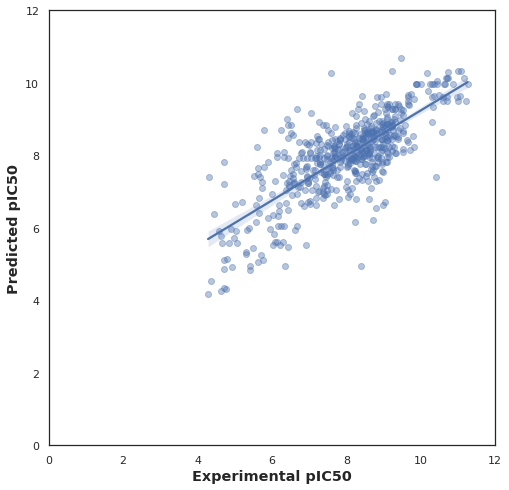

In [68]:
# Plot the linear regression function along with the predicted pIC50 values 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(8, 8)
plt.savefig('predicted_pIC50.svg')
plt.show()

In [69]:
# Store model
import pickle
pickle.dump(model, open('erk_model.pkl','wb'))